In [1]:
# reload libraries each time in notebook
%load_ext autoreload 
%autoreload 2

In [ ]:
# Install cece
!pip install cece

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/giorgosfilandrianos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Use Case 1: Calculate the GED between 2 objects

In [3]:
from cece.queries import *
from cece.refine import *


q1 = Query(np.array([set(["car", "vehicle"]), set(["tree"])]))
q2 = Query(np.array([set(["car"]), set(["tree"]), set(["person"])]))

r = refine (q1, q2,verbose= True, return_edits = True)

print (r)

Remains the same: {'tree'}
-------------------------------------
Tranform {'car'} from {'vehicle'} -> set()
Add: {'person'}
--------------------------------------
(2, {'additions': [{'person'}], 'removals': [], 'transf': [({'car', 'vehicle'}, {'car'})]})


In [4]:
from cece.wordnet import *

q1 = Query(np.array([set(connect_term_to_wordnet("car")),
                     set(connect_term_to_wordnet("man")),]))

q2 = Query(np.array([set(connect_term_to_wordnet("woman")),
                     set(connect_term_to_wordnet("truck"),)]))

r = refine (q1, q2,verbose= True, return_edits = True)
print ("Cost: ", r[0])

-------------------------------------
Tranform {'object.n.01', 'vehicle.n.01', 'whole.n.02', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'motor_vehicle.n.01', 'instrumentality.n.03', 'physical_entity.n.01', 'wheeled_vehicle.n.01', 'artifact.n.01', 'entity.n.01'} from {'car.n.01'} -> {'truck.n.01'}
Tranform {'adult.n.01', 'object.n.01', 'living_thing.n.01', 'whole.n.02', 'person.n.01', 'physical_entity.n.01', 'organism.n.01', 'entity.n.01'} from {'man.n.01'} -> {'woman.n.01'}
--------------------------------------
Cost:  4


In [5]:

q1 = Query(np.array([connect_term_to_wordnet("tree"),
                     connect_term_to_wordnet("man"),]))

q2 = Query(np.array([connect_term_to_wordnet("man"),
                     connect_term_to_wordnet("truck"),]))

r = refine (q1, q2,verbose= True, return_edits = True)
print ("Cost: ", r[0])

Remains the same: {'adult.n.01', 'object.n.01', 'living_thing.n.01', 'whole.n.02', 'person.n.01', 'man.n.01', 'physical_entity.n.01', 'organism.n.01', 'entity.n.01'}
-------------------------------------
Tranform {'object.n.01', 'whole.n.02', 'physical_entity.n.01', 'entity.n.01'} from {'living_thing.n.01', 'tree.n.01', 'woody_plant.n.01', 'vascular_plant.n.01', 'plant.n.02', 'organism.n.01'} -> {'vehicle.n.01', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'motor_vehicle.n.01', 'instrumentality.n.03', 'wheeled_vehicle.n.01', 'truck.n.01', 'artifact.n.01'}
--------------------------------------
Cost:  14


### or even simpler

In [6]:
q1 = Query(np.array(connect_list_to_wordnet(["tree", "man"])))
q2 = Query(np.array(connect_list_to_wordnet(["man", "truck"])))
r = refine (q1, q2,verbose= True, return_edits = True)
print ("Cost: ", r[0])

Remains the same: {'adult.n.01', 'object.n.01', 'living_thing.n.01', 'whole.n.02', 'person.n.01', 'man.n.01', 'physical_entity.n.01', 'organism.n.01', 'entity.n.01'}
-------------------------------------
Tranform {'object.n.01', 'whole.n.02', 'physical_entity.n.01', 'entity.n.01'} from {'living_thing.n.01', 'tree.n.01', 'woody_plant.n.01', 'vascular_plant.n.01', 'plant.n.02', 'organism.n.01'} -> {'vehicle.n.01', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'motor_vehicle.n.01', 'instrumentality.n.03', 'wheeled_vehicle.n.01', 'truck.n.01', 'artifact.n.01'}
--------------------------------------
Cost:  14


## Or even simpler

In [7]:
from cece.xDataset import createMSQ

q1 = createMSQ(["tree", "man"], connect_to_wordnet = True)
q2 = createMSQ(["man", "truck"], connect_to_wordnet = True)
r = refine (q1, q2,verbose= True, return_edits = True)
print ("Cost: ", r[0])

Remains the same: {'adult.n.01', 'object.n.01', 'living_thing.n.01', 'whole.n.02', 'person.n.01', 'man.n.01', 'physical_entity.n.01', 'organism.n.01', 'entity.n.01'}
-------------------------------------
Tranform {'object.n.01', 'whole.n.02', 'physical_entity.n.01', 'entity.n.01'} from {'living_thing.n.01', 'tree.n.01', 'woody_plant.n.01', 'vascular_plant.n.01', 'plant.n.02', 'organism.n.01'} -> {'vehicle.n.01', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'motor_vehicle.n.01', 'instrumentality.n.03', 'wheeled_vehicle.n.01', 'truck.n.01', 'artifact.n.01'}
--------------------------------------
Cost:  14


## ## Use Case 2: Use it for a Datatset

In [8]:
from cece.xDataset import *


# initialize an instance of the Dataset
ds = xDataset(dataset = [["tree", "man"],
                         ["man", "truck"],
                         ["kitchen", "oven", "refrigerator"], 
                         ["bed", "pillow", "blanket", "woman"],
                         ["sofa", "cushion", "pillow"],],

              labels = ["outdoor", "outdoor", "indoor", "indoor", "indoor"],
              connect_to_wordnet = True)


ds.retrieve(ds.dataset[1])

{1: 0, 0: 14, 4: 28, 3: 29, 2: 36}

In [9]:
for idx, cost in ds.retrieve(ds.dataset[1]).items():
    print (f"Cost: {cost} for '{ds.labels[idx]}' with id: {idx}")

Cost: 0 for 'outdoor' with id: 1
Cost: 14 for 'outdoor' with id: 0
Cost: 28 for 'indoor' with id: 4
Cost: 29 for 'indoor' with id: 3
Cost: 36 for 'indoor' with id: 2


In [10]:
results = ds.retrieve([ "car", "woman"])

for idx, cost in results.items():
    print (f"Cost: {cost} for '{ds.labels[idx]}' with id: {idx}")

Cost: 4 for 'outdoor' with id: 1
Cost: 16 for 'outdoor' with id: 0
Cost: 27 for 'indoor' with id: 3
Cost: 28 for 'indoor' with id: 4
Cost: 36 for 'indoor' with id: 2


### Explain Method - Get a Semantic Counterfatual

In [11]:
results = ds.explain([ "car", "woman"], "outdoor")

print (f"Cost: {results[1]} for '{ds.labels[results[0]]}' with id: {results[0]}")

Cost: 27 for 'indoor' with id: 3


In [12]:
from cece.xDataset import *
ds.find_edits(["car", "man"], ["woman", "truck"])

(4,
 {'additions': [],
  'removals': [],
  'transf': [({'artifact.n.01',
     'car.n.01',
     'conveyance.n.03',
     'entity.n.01',
     'instrumentality.n.03',
     'motor_vehicle.n.01',
     'object.n.01',
     'physical_entity.n.01',
     'self-propelled_vehicle.n.01',
     'vehicle.n.01',
     'wheeled_vehicle.n.01',
     'whole.n.02'},
    {'artifact.n.01',
     'conveyance.n.03',
     'entity.n.01',
     'instrumentality.n.03',
     'motor_vehicle.n.01',
     'object.n.01',
     'physical_entity.n.01',
     'self-propelled_vehicle.n.01',
     'truck.n.01',
     'vehicle.n.01',
     'wheeled_vehicle.n.01',
     'whole.n.02'}),
   ({'adult.n.01',
     'entity.n.01',
     'living_thing.n.01',
     'man.n.01',
     'object.n.01',
     'organism.n.01',
     'person.n.01',
     'physical_entity.n.01',
     'whole.n.02'},
    {'adult.n.01',
     'entity.n.01',
     'living_thing.n.01',
     'object.n.01',
     'organism.n.01',
     'person.n.01',
     'physical_entity.n.01',
     'who

### Global Explanations 

In [13]:
from cece.xDataset import *

# initialize an instance of the Dataset
ds = xDataset(dataset = [["tree", "man"],
                         ["man", "truck"],
                         ["kitchen", "oven", "refrigerator", "man"], 
                         ["bed", "blanket", "woman"],
                         ["sofa", "pillow", "man"],],

              labels = ["outdoor", "outdoor", "indoor", "indoor", "indoor"],
              connect_to_wordnet = True)

ds.global_explanation([["tree", "man", "car"], ["man", "truck", "car"]], ["outdoor", "outdoor"])

{'vehicle.n.01': -3,
 'self-propelled_vehicle.n.01': -3,
 'conveyance.n.03': -3,
 'motor_vehicle.n.01': -3,
 'wheeled_vehicle.n.01': -3,
 'padding.n.01': 2,
 'pillow.n.01': 2,
 'cushion.n.03': 2,
 'car.n.01': -2,
 'furnishing.n.02': 2,
 'furniture.n.01': 2,
 'seat.n.03': 2,
 'sofa.n.01': 2,
 'living_thing.n.01': -1,
 'tree.n.01': -1,
 'woody_plant.n.01': -1,
 'vascular_plant.n.01': -1,
 'plant.n.02': -1,
 'organism.n.01': -1,
 'artifact.n.01': 1,
 'truck.n.01': -1,
 'instrumentality.n.03': -1}

In [14]:
ds.dataset

xDataset with 5 instances

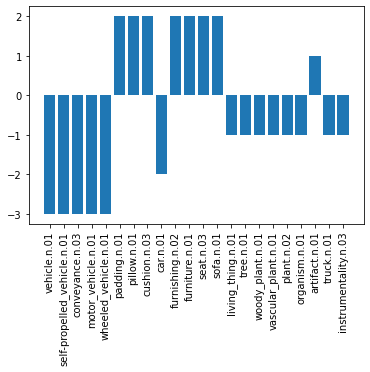

In [15]:
# plot the global explanation in abar plot
import matplotlib.pyplot as plt

explanations = ds.global_explanation([["tree", "man", "car"], ["man", "truck", "car"]], ["outdoor", "outdoor"])

plt.bar(explanations.keys(), explanations.values())
plt.xticks(rotation=90)
plt.show()

# Graphs

In [16]:
# Create an instance of a graph
# The graph bellow contains the triples:
# (car, in, garage)
# (person, in, car)
# (person, in, garage)

instance1 = [
    connect_list_to_wordnet(["car", "in^garage"]),
    connect_list_to_wordnet(["person", "in^car"]),
    connect_list_to_wordnet(["person", "in^garage"]),
]

# and also we create two additional instances in order to create an Explanation Dataset
instance2 = [
    connect_list_to_wordnet(["car", "in^garage"]),
    connect_list_to_wordnet(["cat", "in^car"]),
    connect_list_to_wordnet(["person", "in^garage"]),
]
    

instance3 = [
    connect_list_to_wordnet(["car", "in^garage"]),
    connect_list_to_wordnet(["dog", "in^car"]),
    connect_list_to_wordnet(["person", "in^garage"]),
]


from cece.graph import *

# we transform the instances to a graph through the Graph class
# this class gives us additional functionality
g1 = Graph (instance1, connect_to_wordnet = False)
g2 = Graph (instance2, connect_to_wordnet = False)
g3 = Graph (instance3, connect_to_wordnet = False)


# calculate the set edit cost from graph g1 to graph g2, along with the set edit path
g1.cost(g2, return_edits = True)

(9,
 {'additions': [],
  'removals': [],
  'transf': [([{'object.n.01', 'living_thing.n.01', 'whole.n.02', 'person.n.01', 'physical_entity.n.01', 'organism.n.01', 'entity.n.01'}
     {'object.n.01', 'vehicle.n.01', 'linear_unit.n.01', 'whole.n.02', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'car.n.01', 'instrumentality.n.03', 'physical_entity.n.01', 'wheeled_vehicle.n.01', 'definite_quantity.n.01', 'artifact.n.01', 'entity.n.01', 'unit_of_measurement.n.01', 'inch.n.01', 'abstraction.n.06', 'motor_vehicle.n.01', 'measure.n.02'}]
    {},
    [{'vertebrate.n.01', 'object.n.01', 'carnivore.n.01', 'living_thing.n.01', 'placental.n.01', 'feline.n.01', 'whole.n.02', 'animal.n.01', 'cat.n.01', 'physical_entity.n.01', 'mammal.n.01', 'organism.n.01', 'chordate.n.01', 'entity.n.01'}
     {'object.n.01', 'vehicle.n.01', 'linear_unit.n.01', 'whole.n.02', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'car.n.01', 'instrumentality.n.03', 'physical_entity.n.01', 'wheeled_vehicle.n.01', 'defi

In [17]:
# simpler way to create graphs using connect_to_wordnet = True parameter
instance1 = [["car", "in^garage"], ["person", "in^car"], ["person", "in^garage"]]
instance2 = [["car", "in^garage"], ["cat", "in^car"], ["person", "in^garage"]]
instance3 = [["car", "in^garage"], ["dog", "in^car"], ["person", "in^garage"]]

from cece.graph import *

g1 = Graph (instance1, connect_to_wordnet = True)
g2 = Graph (instance2, connect_to_wordnet = True)
g3 = Graph (instance3, connect_to_wordnet = True)

g1.cost(g2, return_edits = True)

(9,
 {'additions': [],
  'removals': [],
  'transf': [([{'object.n.01', 'living_thing.n.01', 'whole.n.02', 'person.n.01', 'physical_entity.n.01', 'organism.n.01', 'entity.n.01'}
     {'object.n.01', 'vehicle.n.01', 'linear_unit.n.01', 'whole.n.02', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'car.n.01', 'instrumentality.n.03', 'physical_entity.n.01', 'wheeled_vehicle.n.01', 'definite_quantity.n.01', 'artifact.n.01', 'entity.n.01', 'unit_of_measurement.n.01', 'inch.n.01', 'abstraction.n.06', 'motor_vehicle.n.01', 'measure.n.02'}]
    {},
    [{'vertebrate.n.01', 'object.n.01', 'carnivore.n.01', 'living_thing.n.01', 'placental.n.01', 'feline.n.01', 'whole.n.02', 'animal.n.01', 'cat.n.01', 'physical_entity.n.01', 'mammal.n.01', 'organism.n.01', 'chordate.n.01', 'entity.n.01'}
     {'object.n.01', 'vehicle.n.01', 'linear_unit.n.01', 'whole.n.02', 'self-propelled_vehicle.n.01', 'conveyance.n.03', 'car.n.01', 'instrumentality.n.03', 'physical_entity.n.01', 'wheeled_vehicle.n.01', 'defi

In [18]:
instance1 = [["car", "in^garage"], ["person", "in^car"], ["person", "in^garage"]]
instance2 = [["car", "in^garage"], ["cat", "in^car"], ["person", "in^garage"]]
instance3 = [["car", "in^garage"], ["dog", "in^car"], ["person", "in^garage"]]

dataset = [instance1, instance2, instance3]
gd = xDataset(dataset, ["outdoor", "indoor", "indoor"], connect_to_wordnet =True, is_graph = True)

In [19]:
gd.retrieve([["car", "in^car"], ["person", "in^car"], ["person", "in^garage"]])

{0: 11, 1: 20, 2: 20}

In [20]:
gd.explain([["car", "in^car"], ["person", "in^car"], ["person", "in^garage"]], "indoor")

(0, 11)